In [9]:
import os
import numpy as np
import pandas as pd
from PIL import Image

import cv2
from skimage.feature import hog

from sklearn import svm
from sklearn.model_selection import train_test_split

# Lendo dados

In [2]:
def process_image(image_path):
    # Abrir a imagem e convertê-la para escala de cinza
    img = Image.open(image_path).convert('L')
    # Converter a imagem em um array numpy
    img_array = np.array(img)
    # Binarizar a imagem (0 para preto e 1 para branco)
    img_binary = (img_array > 127).astype(int)  # Usando um limiar de 127
    return img_binary

In [3]:
def load_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg'):
            img_path = os.path.join(folder_path, filename)
            img_binary = process_image(img_path)
            images.append(img_binary.flatten())
    return images

In [4]:
def load_strings_from_folder(folder_path):
    strings = []
    filenames = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.txt'):
            file_path = os.path.join(folder_path, filename)
            try:
                with open(file_path, 'r') as file:
                    content = file.read().strip()
                    strings.append(content)
                    filenames.append(filename)
            except Exception as e:
                print(f"Erro ao ler o arquivo {file_path}: {e}")
    return strings, filenames

In [5]:
treinamento = load_images_from_folder('dados/CAPTCHA-10k/treinamento')
treinamento = np.array(treinamento)
validacao = load_images_from_folder('dados/CAPTCHA-10k/validacao')
validacao = np.array(validacao)
teste = load_images_from_folder('dados/CAPTCHA-10k/teste')
teste = np.array(teste)
labels = load_strings_from_folder('dados/CAPTCHA-10k/labels10k')

In [21]:
treino_x = treinamento
treino_y = labels[:8000]

validacao_x = validacao
validacao_y = labels[8001:9000]

teste_x = teste
teste_y = labels[9001:]

# HOG

In [58]:
def preprocess_image(image_array):
    # Certifique-se de que a imagem está no formato correto (180x50)
    image_array = np.reshape(image_array, (50, 180))
    
    # Calcular os recursos HOG diretamente do array
    fd, hog_image = hog(image_array, orientations=64, pixels_per_cell=(50, 30),
                        cells_per_block=(1, 1), visualize=True)
    


    return fd, hog_image

In [27]:
image_array = np.reshape(teste_x[5], (50, 180))

In [29]:
image_array.ndim

2

In [59]:
a = preprocess_image(teste_x[5])

In [48]:
a.shape

(50, 180)

In [56]:
import matplotlib.pyplot as plt

def display_hog_image(hog_image):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

    ax1.axis('off')
    ax1.imshow(image_array, cmap=plt.cm.gray)
    ax1.set_title('Imagem Original')

    ax2.axis('off')
    ax2.imshow(hog_image, cmap=plt.cm.gray)
    ax2.set_title('Histograma de Gradientes Orientados')

    plt.show()

In [66]:
a[0].shape

(384,)

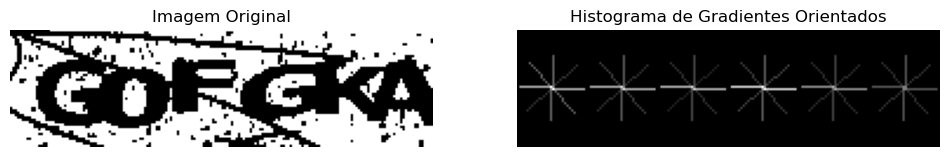

In [61]:
display_hog_image(a[1])